# Importing CSV

In [166]:
import pandas as pd

In [167]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [168]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [169]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


# LIBRARY SETUP

In [203]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick


# EDA

In [171]:
df.shape

(489, 4)

In [172]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [174]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [175]:
minimum_price = df["MEDV"].min()

# Maximum price of the data
maximum_price = df["MEDV"].max()

# Mean price of the data
mean_price = df["MEDV"].mean()
mean_price = round(mean_price)

# Median price of the data
median_price = df["MEDV"].median()

print("Boston Housing Breakdown:\n")
print("Min PRICE: ${}".format(minimum_price)) 
print("Max PRICE: ${}".format(maximum_price))
print("Mean PRICE: ${}".format(mean_price))
print("Median PRICE ${}".format(median_price))

Boston Housing Breakdown:

Min PRICE: $105000.0
Max PRICE: $1024800.0
Mean PRICE: $454343
Median PRICE $438900.0


In [176]:
corr = df.corr()
corr.shape

(4, 4)

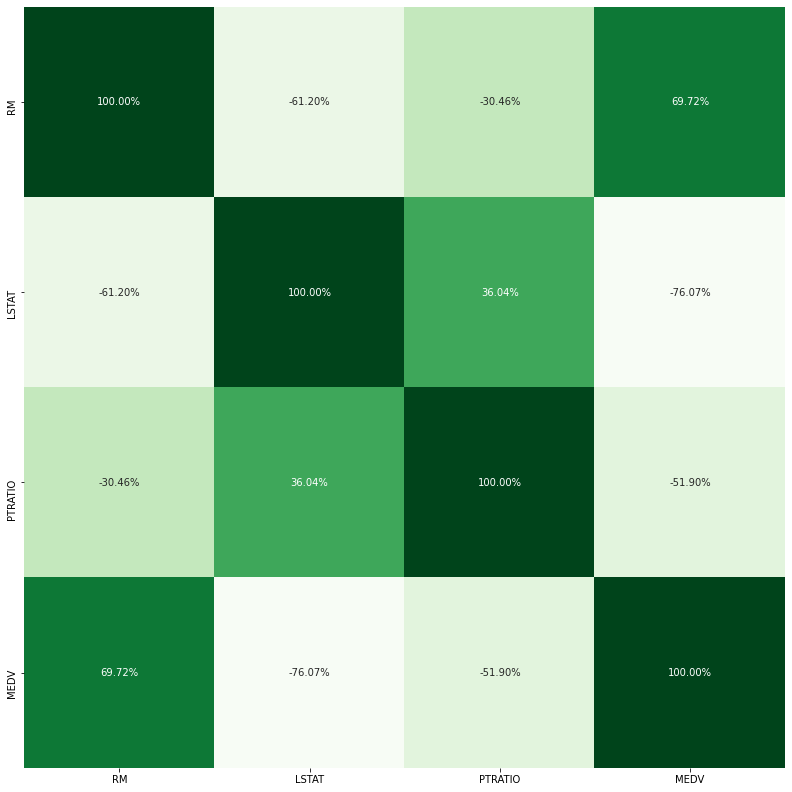

In [177]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt=".2%", annot=True, cmap="Greens")

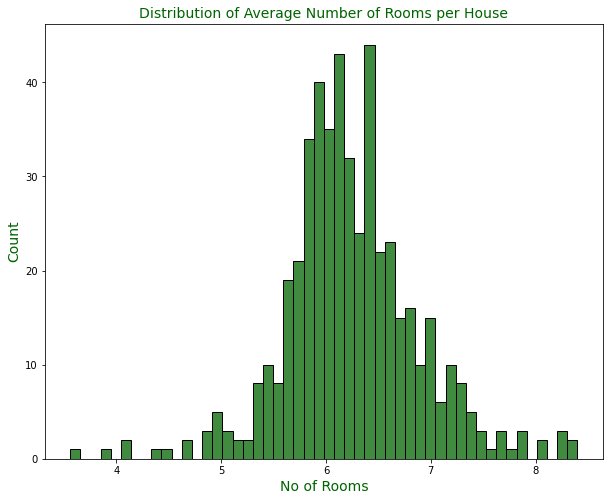

In [178]:
plt.figure(figsize=(10,8))
sns.histplot(df["RM"],kde=False,color="darkgreen",bins=50)
plt.title("Distribution of Average Number of Rooms per House", fontsize=14, color = "darkgreen")
plt.xlabel("No of Rooms", fontsize = 14, color = "darkgreen")
plt.ylabel("Count",fontsize = 14, color = "darkgreen")
plt.show()

In [179]:
import plotly.graph_objects as go

size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x=df["LSTAT"],
    y=df["MEDV"],
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.update_layout(
    title="Student to Teacher Ratio vs House Prices (millions) ",
    xaxis_title="Student to Teacher Ratio",
    yaxis_title="House Prices",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="darkgreen"
    ))

fig.show()



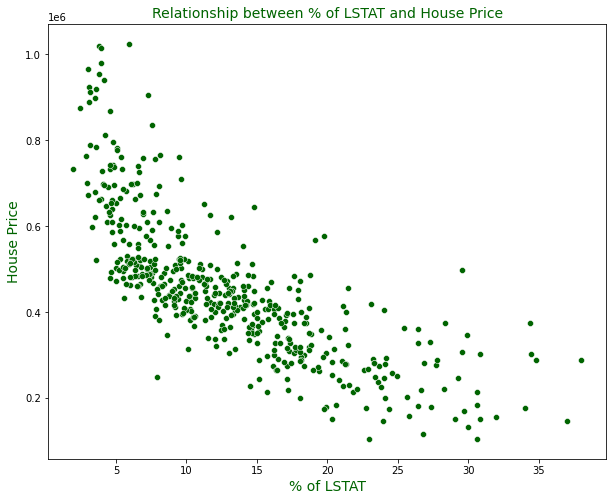

In [180]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,
                x='LSTAT',
                y='MEDV', color = "darkgreen")
plt.title("Relationship between % of LSTAT and House Price", fontsize=14, color = "darkgreen")
plt.xlabel("% of LSTAT", fontsize = 14, color = "darkgreen")
plt.ylabel("House Price",fontsize = 14, color = "darkgreen")

plt.show()


# EDA FINDINGS:

### **Price Breakdown**

A simple price breakdown shows us that the house prices in Boston from our dataset range from **\$105 000** to **\$1 024 800** with an average price of **\$454 343**. 

### **Correlation Heat Map**  

Each square shows the CORRELATION between the variables on each axis. 

Values closer to zero means there is LESS of a LINEAR TREND between the two variables. 

The closer the number gets to 100% the MORE POSITIVELY CORRELATED the variables are. 

Therefore:

**RM** has a strong positive correlation with the House Price (MEDV). Therefore as the average number of rooms increase we can assume that the MEDV value will increase too. 

**LSTAT** is strongly NEGATIVELY correlated with MEDV. As such the data shows us that as the percentage of owners in the neighbourhood who are classified as "working poor" INCREASES we would expect to see a big DECREASE in the prices of houses in that neighbourhood.

Finally **PTRATIO** is also NEGATIVELY correlated with MEDV. As such a decrease in the ration of students to teachers(i.e Smaller class room sizes of schools in the neighbourhood) should lead to an INCREASE in the price of the surrounding houses. 

### **AVERAGE NUMBER OF ROOMS (RM)**

We can see that the average number of rooms per house in the neighbourhood is mostly distributed between **5 to 7** rooms

### **Student:Teacher Ratio (PTRATIO)**

The bubble chart above is a nice illustration of the previously mention positive correlation between the PTRATIO and MEDV. We can see that around a ratio of around **5 students to every 1 teacher** should yield the highest average house price. 

### **Percentage of "Working Poor" Homeowners (LSTAT)**

As we can see from the above scatterplot the lower the percentage of families who have been classified as "working poor" per neighbourhood, the higher the MEDV. 







# R2 SCORE

### **Question :** Calculate R2 score on these data points

In [181]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
r2_score = r2_score(y_true, y_pred)

print("R2 score for these datapoints: ", r2_score)

R2 score for these datapoints:  0.9228556485355649


### **Question :** What is the range of R2? 

The range of the R2 score is from 0 to 1. 

Essentially, A **high** R-Squared value would indicate that a **high percentage of the variance of the dependent variable** (in this case our MEDV column which we are looking to predict) is explained by the **variance of the independent variable** (our parameters LSTAT, RM and PTRATIO)

### **Question:** How can we know if a model performs well or not by using R2 score?

After fitting a linear regression model or a KNN model, you need to determine how well the model fits the data.

R-squared evaluates the **scatter of the data points around the fitted regression line**.

Higher R-squared values represent **smaller differences** between the observed data and the fitted values.

High R2 value is **NOT** always good though. Specification bias occurs if our model is **missing significant independent variables** and or polynomial terms. We can fix this by making our **model more complex!**

# Model Fitting: Linear Regression

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["MEDV"]), 
                                                    df['MEDV'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [183]:
Linear = LinearRegression()

In [184]:
Linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
y_pred = Linear.predict(X_train)

In [186]:
print("R2 Training Accuracy: ", Linear.score(X_train, y_train))
print("R2 Testing Accuracy: ", Linear.score(X_test, y_test))

R2 Training Accuracy:  0.7194530968926247
R2 Testing Accuracy:  0.6910934003098511


In [198]:
cross_val_Lin = cross_val_score(Linear, X_train, y_train, cv = 5, scoring = "r2").mean()
print("Cross-Validation R2 Score:", cross_val_Lin)

Cross-Validation R2 Score: 0.7101765633513898


# Polynomial Features (helps to fit the data better)

In [189]:
poly_degrees = []

for i in range(1,15):

  Linear_pipe = Pipeline([('scaler', StandardScaler()),
                       ("poly", PolynomialFeatures(degree=i)), 
                      ("Linearmodel", LinearRegression())])
  cross_val = cross_val_score(Linear_pipe, X_train, y_train, cv = 5, scoring = "r2").mean()
  poly_degrees.append(cross_val)

  print(cross_val)

poly_cross_Linear = max(poly_degrees) 



0.7101765633513899
0.8254234072435068
0.8278147591810064
0.4745758758105759
0.39582810671561625
-190.89817220393437
-10569.452527405329
-1317147.2562091697
-69451395.83353384
-438161083207.8209
-2.5813703629513736e+16
-8.800134061097487e+17
-9.471178990571411e+18
-9.38735755196509e+19


### From this we can conclude that in order to help the model to make clearer predictions we should add Polynomial Features to the 3rd degree which will **IMPROVE** our cross_validation R2_score from **0.71 to 0.827**

# Model Fitting: KNN Model

In [190]:
KNN_pipe = Pipeline([('scaler', StandardScaler()),
                      ("KNNmodel", KNeighborsRegressor())])

In [206]:
KNN_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNNmodel',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=99, p=2,
                                     weights='uniform'))],
         verbose=False)

In [192]:
y_pred_KNN = KNN_pipe.predict(X_train)

y_test_pred_KNN = KNN_pipe.predict(X_test)


In [193]:
print("R2 Training Accuracy: ", KNN_pipe.score(X_train, y_train))
print("R2 Testing Accuracy: ", KNN_pipe.score(X_test, y_test))

R2 Training Accuracy:  0.8783588662447609
R2 Testing Accuracy:  0.8147338892500173


In [194]:
cross_val1 = cross_val_score(KNN_pipe, X_train, y_train, cv = 5, scoring = "r2").mean()
print("Cross-Validation R2 Score:", cross_val1)

Cross-Validation R2 Score: 0.8103894882318846


# Using Cross-Validation to decide on the best K Value

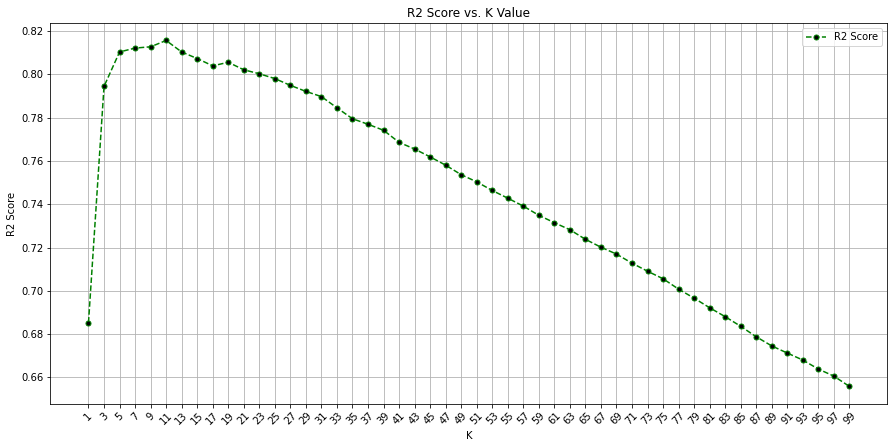

In [195]:
from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,100,2) # hyperparameters
# [1,3,5,7...]
for i in neighbors_range:
    KNN_pipe = Pipeline([('scaler', StandardScaler()),
                      ("KNNmodel", KNeighborsRegressor(n_neighbors=i, p=2))])
    val_error = cross_val_score(KNN_pipe, X_train, y_train, cv=5, scoring = "r2").mean() # accuracy therefore the error is 1 - the accuracy.
    val_error_rate.append(val_error)
    
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='green', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='R2 Score')

plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=45)
plt.grid()
plt.legend()
plt.title('R2 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('R2 Score')
plt.show()



In [196]:
cross_val_KNN = max(val_error_rate)
cross_val_KNN

### Looking at the data the optimal K Value after using Cross Validation would be 11 as it yields the highest R2 score all things considered.

# R2 SCORE SUMMARY

In [199]:
print("Linear Regression Cross_validation R2_score:" , cross_val_Lin )
print("KNN Regression Cross_validation R2_score:" , cross_val1, "\n" )

print("Linear Regression Cross_validation (After adding Polynomial Features) R2_score:" , poly_cross_Linear )
print("KNN Regression Cross_validation (After deciding on the best value for K) R2_score:" , cross_val_KNN )

Linear Regression Cross_validation R2_score: 0.7101765633513898
KNN Regression Cross_validation R2_score: 0.8103894882318846
Linear Regression Cross_validation (After adding Polynomial Features) R2_score: 0.8278147591810064
KNN Regression Cross_validation (After deciding on the best value for K) R2_score: 0.8156956202574677


# PREDICTING PRICES 

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

What price would you recommend each client sell his/her home at?
Do these prices seem reasonable given the values for the respective features?

In [200]:
client_data = [[5, 17, 15], 
               [4, 32, 22], 
               [8, 3, 12]]  

In [205]:
for i, y_pred in enumerate(Linear.predict(client_data)):
    print("Linear Regression Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, y_pred))

Linear Regression Predicted selling price for Client 1's home: $374,221.68
Linear Regression Predicted selling price for Client 2's home: $-7,680.95
Linear Regression Predicted selling price for Client 3's home: $842,850.45


In [207]:
for i, y_pred in enumerate(KNN_pipe.predict(client_data)):
    print("KNN Regression Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, y_pred))

KNN Regression Predicted selling price for Client 1's home: $425,409.09
KNN Regression Predicted selling price for Client 2's home: $314,533.33
KNN Regression Predicted selling price for Client 3's home: $659,696.97


# APPLICABILITY

### **How relevant today is data that was collected from 1978? How important is inflation?**

Data collected in 1978 is vastly different to any data that could be collected in 2021. Simply put the world has changed and socio-economics has changed along with it. The same neighbourhood in Boston today could face a variety of different challeneges as we as be made up of an entirely different demographic. Inflation plays a massive part in pricing too.  

### **Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?**

While the features that were present in the data were incredibly interesting, they were not sufficient to describe the value of a home. Employment opportunities, Proximity to shopping malls, the age and condition of the house could have been included with the features mentioned above to get a more accurate assesment of house value and price. 

### **Is the model robust enough to make consistent predictions? Would data collected in an urban city like Boston be applicable in a rural city?**

A model is considered to be robust if its output and forecasts are consistently accurate even if the input variable are varied drastically. Well my Linear regression model certainly isn't robust as it predicted a NEGATIVE house price! On the other hand my KNN model after cross validation seems resonably robust and effective. 

Unfortunately, the data collected in an urban city like Boston might not be applicable in rural cities. An example of this is the LSTAT ratio. In a rural city this ratio might be the same as in Boston but that does not mean that the quality of teaching and the school would be the same as in Boston. 



### **Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?**

It is not fair to judge an individual home based SOLELY on the characteristics of an entire neighbourhood. While the houses in the same neighbourhood are a good STARTING POINT for price valuation there could be a huge disparity in the range of prices and quality of schooling in these neighbourhoods which also need to be considered. 

